In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
"""
    We are going to attempt to predict whether or not a passenger survived 
    based off of their features
"""
# class for first class, second depending on the ticket
# sibsp for number of siblings/spouses aboard
# parch for parents/children aboard
# embarked for port embarked on
trainTitanic = pd.read_csv('titanic_train.csv')
trainTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

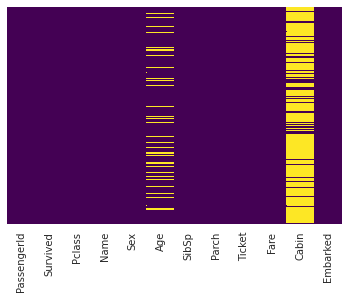

In [6]:
#  check where we miss most data
sns.heatmap(trainTitanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# from the plot below we can see that most null values are in the cabin and age columns

In [7]:
sns.set_style('whitegrid')

'\n    from the plot below, we can see that there were more \n    people who died than those who survived\n    0=died\n    1=survived\n'

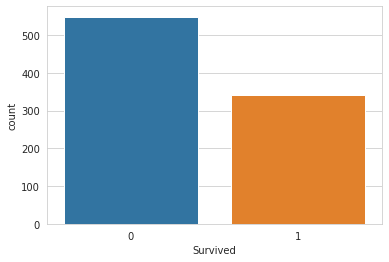

In [8]:
#  For a classification problem its good to know the ratio of our target labels
# get a count of who survived and who didn't
sns.countplot(x='Survived', data= trainTitanic)
"""
    from the plot below, we can see that there were more 
    people who died than those who survived
    0=died
    1=survived
"""

'\n    we can see that there were more females who survived than men\n    and more men who died than women\n'

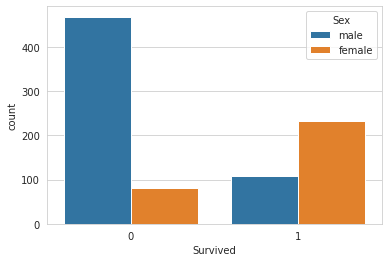

In [9]:
#  survival woth hue of sex
sns.countplot(x='Survived',hue='Sex', data= trainTitanic)
"""
    we can see that there were more females who survived than men
    and more men who died than women
"""

'\n    there were more people from the third class who died than other classes\n    and more people from the 1st class who survived than others\n'

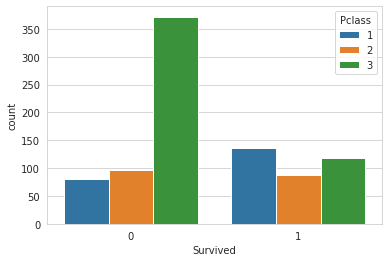

In [10]:
sns.countplot(x='Survived',hue='Pclass', data= trainTitanic)
"""
    there were more people from the third class who died than other classes
    and more people from the 1st class who survived than others
"""

/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'\n    the distribution of ages in our dataset\n    drop the null values in the column\n    \n'

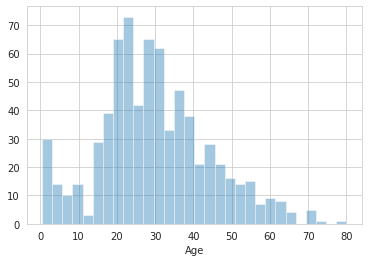

In [11]:
sns.distplot(trainTitanic['Age'].dropna(), kde=False, bins=30)
"""
    the distribution of ages in our dataset
    drop the null values in the column
    
"""

In [12]:
"""
        CLEAN DATA
        Fill in missing data in the age column using the mean age(imputation)
"""

'\n        CLEAN DATA\n        Fill in missing data in the age column using the mean age(imputation)\n'

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

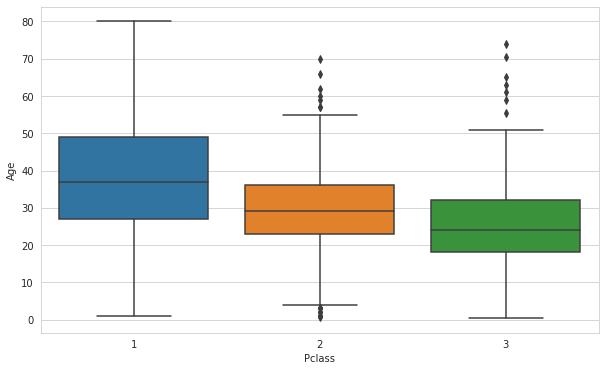

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Age', data=trainTitanic)

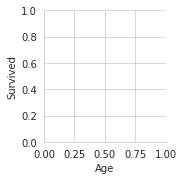

In [13]:
sns.pairplot(x_vars='Age', y_vars='Survived', data=trainTitanic)

In [14]:
"""
    the function will take in a list of columns and check if the age is null
    we impute the ages depending on the average of the classes of tickets
    eg 1st class had an avg of age 37
    
"""
def impute_age(cols):
    Age= cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass == 2:
            return 29
        else: 
            return 24
        
    else:
        return Age
        
        

In [15]:
trainTitanic['Age'] = trainTitanic[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

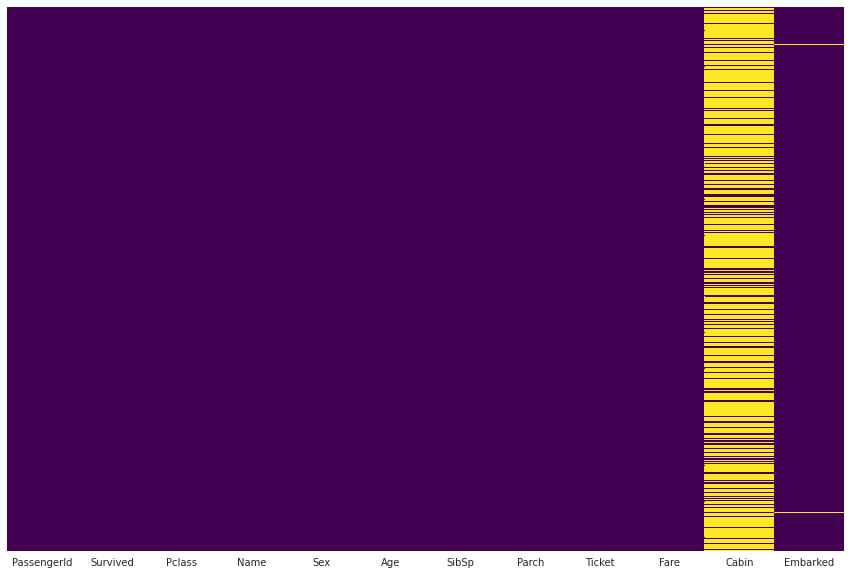

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(trainTitanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [17]:
# drop the cabin col since most rows dont have data
trainTitanic.drop('Cabin', axis=1, inplace=True)

In [18]:
#  since the embarked column has some null values, we drop the null rows
trainTitanic.dropna(inplace=True)

In [19]:
"""
    the next step is to create categorical data for the sex column
    an ML model wouldnt understand the text on the column thus we create dummy vars
    since gender is binary, one gender given would predict the other
        ie if not male, then is female
        this issue is called multicollinearity
        thus we drop first column called female so as to remain with one 
    we also do it for the embarked column
"""
sex = pd.get_dummies(trainTitanic['Sex'],drop_first=True )
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [20]:
embarked =  pd.get_dummies(trainTitanic['Embarked'], drop_first=True)
embarked.head()
# if not Q and not S then is C

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [21]:
# add the new dataframes to our existing titanic one
trainTitanic = pd.concat([trainTitanic, sex, embarked], axis=1)
trainTitanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [22]:
trainTitanic.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)


In [23]:
trainTitanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [24]:
trainTitanic.drop('PassengerId', axis=1, inplace=True)
trainTitanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
X = trainTitanic.drop('Survived', axis=1)
y = trainTitanic['Survived']

In [27]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,24.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [28]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()

In [33]:
logmodel.fit(X_train, y_train)

/usr/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()